<a href="https://colab.research.google.com/github/luiseduardoalencar/modelosIA/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

#Descrição do dataset

In [2]:
print(load_digits().DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#Carregamento de dados

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

# Carregamos o conjunto de dados digits:
# X contém as imagens dos dígitos (cada imagem é uma matriz achatada de 64 pixels).
# y contém as labels (dígitos de 0 a 9).

#Simplificar para uma classsificação binária: digitos 0 como classes positivas vs não 0 como sendo negativo

In [4]:
y_binary = np.where(y == 0, 1, 0)

# Binarizamos o conjunto de dados:
# Foi considerado 0 como a classe positiva (1) e todas as outras como classe negativa (0).

#Função para normalizar os dados com Min-Max scaler

In [5]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Normalizamos os dados para que cada característica esteja entre 0 e 1.
# Utilizando o MinMaxScaller, foram transformados os dados para que todas as características fiquem dentro de um intervalo entre 0 e 1

#Dividir os dados em conjuntos de treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_binary, test_size=0.3, random_state=42)

# Dividiu-se os dados em conjuntos de treinamento e teste:
# 70% para treinamento (X_train, y_train).
# 30% para teste (X_test, y_test).

#Perceptron com sigmoide implementado

In [7]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

# Foi Definido a classe Perceptron com o método __init__ para inicializar o perceptron:
#   learning_rate: Taxa de aprendizado para atualização dos pesos.
#   n_iter: Número de iterações (épocas) para o treinamento.


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
# Foi Definido a função de ativação sigmoide, que calcula 1 / (1 + e^(-z))

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []
# O método fit inicializa os pesos (com um adicional para o bias) e uma lista para armazenar erros por época.

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                input_data = self.input_data(xi)
                output = self.sigmoid(input_data)
                error = target - output
                update = self.learning_rate * error
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

# Primeira interação treina o perceptron por n_iter épocas:
# Define a variável errors com valor inicial 0. Esta variável contará o número de erros de classificação durante cada iteração.
# Inicia um segundo loop que percorre os pares de valores das listas X (características dos dados de entrada) e y (valores alvo/etiquetas).
# xi representa uma única amostra de entrada e target representa o valor alvo correspondente a essa amostra.
# self.input_data(xi) calcula a soma ponderada das entradas xi com os pesos atuais.
# Calculo do  erro de previsão como a diferença entre o valor alvo target e a saída prevista output.
# Calcula a quantidade de atualização para os pesos. Esta atualização é o produto da taxa de aprendizado (self.learning_rate) pelo erro calculado.
# self.weights[1:] += update * xi -> Atualiza todos os pesos exceto o bias (peso inicial). Cada peso é ajustado pelo produto da atualização calculada e da entrada correspondente xi
# self.weights[0] += update -> Atualiza o peso do bias (peso inicial). Este peso é ajustado diretamente pela atualização calculada.
# errors += int(update != 0.0) -> Incrementa o contador de erros (errors) se houve uma atualização (ou seja, se update não é 0). Isso indica que a previsão estava errada e os pesos precisaram ser ajustados.


    def input_data(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]


# np.dot(X, self.weights[1:]) -> Calcula o produto escalar entre X e self.weights[1:].
# X é o vetor de características da amostra de entrada.
# self.weights[1:] -> são os pesos associados às características, excluindo o peso de bias (peso inicial).
# + self.weights[0] -> Adiciona o peso de bias ao resultado do produto escalar.
# self.weights[0] é o peso de bias, um termo constante que é adicionado ao resultado da multiplicação para ajustar a função de ativação.
# A função input_data essencialmente prepara a entrada para a função de ativação, utilizada para a previsão e a atualização dos pesos no processo de aprendizado do modelo.

    def predict(self, X):
        input_data = self.input_data(X)
        output = self.sigmoid(input_data)
        return np.where(output >= 0.5, 1, 0)

# Foi Calculado a previsão:
# Aplicamos a função sigmoide à output utilizando input_data como parâmetro.
# Retornamos 1 se output for maior ou igual a 0.5, caso contrário, retornamos 0.


#Criar e treinar o perceptron

In [8]:
perceptron_sigmoid = Perceptron(learning_rate=0.01, n_iter=1000)
perceptron_sigmoid.fit(X_train, y_train)

# Foi instanciado o perceptron com a função de ativação sigmoide e fora treinado com os dados de treinamento.

#Fazer as previsoes no conjunto de teste

In [9]:
y_predict = perceptron_sigmoid.predict(X_test)

# Foram feitas as previsões nos dados de teste

#Avaliar a acurácia do modelo

In [10]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9981481481481481


#Visualizar previsões

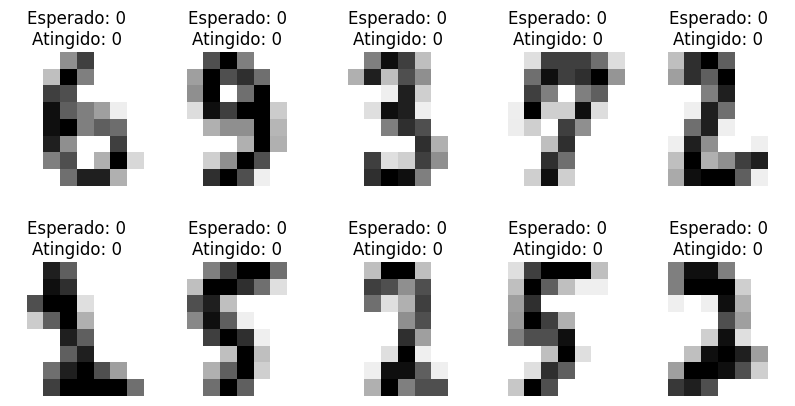

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, true_label, pred_label in zip(axes.ravel(), X_test.reshape(-1, 8, 8), y_test, y_predict):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Esperado: {true_label}\nAtingido: {pred_label}')
    ax.axis('off')

plt.show()